In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/2 BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 1 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [2]:
# =================================================-
#### Slide 5: Directory settings  ####

# Set 'main_dir' to location of the project folder
from pathlib import Path

home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

/Users/maptv/maptv/IntrotoNeural_Networks
/Users/maptv/maptv/IntrotoNeural_Networks/data


In [3]:
from pathlib import Path
data_dir = Path.cwd().parent.parent / "data"

In [4]:
data_dir.exists()

True

In [5]:
# =================================================-
#### Slide 6: Loading packages  ####

# Helper packages.
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from textwrap import wrap

# Scikit-learn package for building a perceptron.
from sklearn.neural_network import MLPClassifier

# Scikit-learn package for data preprocessing.
from sklearn.preprocessing import MinMaxScaler

# Model set up, tuning and model metrics packages.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

/var/folders/0k/09bdrlmx63qf4jwt8dw7nrvc0000gn/T/ipykernel_67842/1651920175.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
# =================================================-
#### Slide 7: Load the data  ####

from pathlib import Path
data_dir = Path.cwd().parent.parent / "data"
credit_card = pd.read_csv(data_dir / "credit_card_data.csv")
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# =================================================-
#### Slide 9: Data at first glance  ####

# The data types.
credit_card.dtypes

ID                              int64
LIMIT_BAL                       int64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                       int64
BILL_AMT3                       int64
BILL_AMT4                       int64
BILL_AMT5                       int64
BILL_AMT6                       int64
PAY_AMT1                        int64
PAY_AMT2                        int64
PAY_AMT3                        int64
PAY_AMT4                        int64
PAY_AMT5                        int64
PAY_AMT6                        int64
default_payment_next_month      int64
dtype: object

In [8]:
# =================================================-
#### Slide 10: Check for NAs in the dataset  ####

# Check for NAs.
credit_card.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     1
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [9]:
# =================================================-
#### Slide 11: Using fillna() to handle missing values  ####

# Fill missing values with mean
credit_card = credit_card.fillna(credit_card.mean())
# Check for NAs in 'BILL_AMT1'.

In [10]:
credit_card.isna().sum()["BILL_AMT1"]

0

In [11]:
# Drop an unnecessary identifier column.
credit_card = credit_card.set_index("ID")
credit_card.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
credit_card.loc[:, credit_card.columns.str.startswith("SEX")]

,SEX
ID,
1,2
2,2
3,2
4,2
5,1
...,...
29996,1
29997,1
29998,1


In [13]:
credit_card.loc[:, credit_card.columns.str.startswith("SEX")]

,SEX
ID,
1,2
2,2
3,2
4,2
5,1
...,...
29996,1
29997,1
29998,1


In [14]:
credit_card.loc[:, credit_card.columns.str.startswith("AGE")].nunique()

AGE    56
dtype: int64

In [15]:
# =================================================-
#### Slide 15: Transform and replace categorical variables  ####

# Convert 'sex' into dummy variables.
credit_card = pd.get_dummies(
    credit_card,
    columns=["SEX", "EDUCATION", "MARRIAGE"],
    drop_first=True,
)
credit_card.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913.0,3102,...,True,False,True,False,False,False,False,True,False,False
2,120000,26,-1,2,0,0,0,2,2682.0,1725,...,True,False,True,False,False,False,False,False,True,False
3,90000,34,0,0,0,0,0,0,29239.0,14027,...,True,False,True,False,False,False,False,False,True,False
4,50000,37,0,0,0,0,0,0,46990.0,48233,...,True,False,True,False,False,False,False,True,False,False
5,50000,57,-1,0,-1,0,0,0,8617.0,5670,...,False,False,True,False,False,False,False,True,False,False


In [16]:
# =================================================-
#### Slide 16: Data prep: split  ####

# Separate predictors from data.
X = credit_card.drop(["default_payment_next_month"], axis=1)

In [17]:
# Separate target from data.
y = credit_card["default_payment_next_month"]
# Split data into train and test set, use a 70 - 30 split.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (21000, 30) Test shape: (9000, 30)


In [18]:
# =================================================-
#### Slide 17: Data prep: scale with MinMaxScaler  ####

# Transforms each feature to a given range.
# The default is the range between 0 and 1.
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [19]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/2 BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [20]:
# =================================================-
#### Slide 2: Build the model architecture  ####

# Build neural network model
nn = MLPClassifier(
    hidden_layer_sizes=(64), random_state=1, max_iter=2000,
)

In [21]:
# =================================================-
#### Slide 3: Fit the model to training data  ####

# Fit the saved model to your training data.
nn.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=64, max_iter=2000, random_state=1)

In [22]:
# =================================================-
#### Slide 4: Inspect accuracy of training model  ####

# Compute accuracy using training data.
acc_train_nn = nn.score(X_train_scaled, y_train)
print("Train Accuracy:", acc_train_nn)

Train Accuracy: 0.8263333333333334


In [23]:
y.value_counts(normalize=True)

default_payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [24]:
# =================================================-
#### Slide 10: Predict on test data  ####

# Predict on test data.
predicted_values_nn = nn.predict(X_test_scaled)
print(predicted_values_nn)

# Compute test model accuracy score.
test_accuracy_score = metrics.accuracy_score(y_test, predicted_values_nn)
print("Accuracy on test data: ", test_accuracy_score)

[0 0 0 ... 0 0 0]
Accuracy on test data:  0.8144444444444444


In [25]:
# =================================================-
#### Slide 11: Confusion matrix   ####

# Take a look at test data confusion matrix.
conf_matrix_test = metrics.confusion_matrix(y_test, predicted_values_nn)
conf_matrix_test

array([[6651,  389],
       [1281,  679]])

In [26]:
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


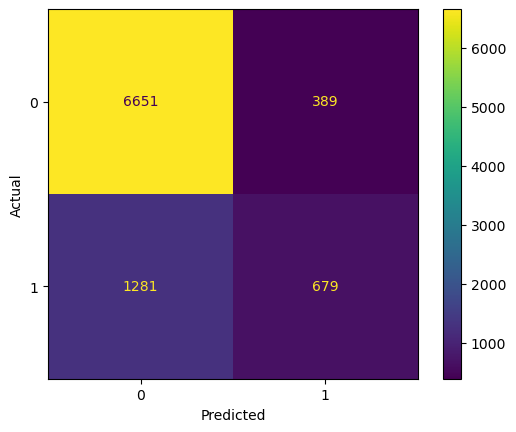

In [27]:
from sklearn import metrics
cmd = metrics.ConfusionMatrixDisplay.from_estimator(nn, X_test_scaled, y_test)
plt.xlabel("Predicted");
plt.ylabel("Actual");

In [28]:
((tn, fp), (fn, tp)) = cmd.confusion_matrix

In [29]:
recall = tp / cmd.confusion_matrix.sum(axis=1)[1]
recall = tp / (tp + fn)
recall

0.3464285714285714

In [30]:
tpr = recall

In [31]:
fnr = 1 - recall
fnr

0.6535714285714286

In [32]:
tnr = tn / cmd.confusion_matrix.sum(axis=1)[0]
tnr = tn / (tn + fp)
tnr

0.9447443181818181

In [33]:
precision = tp / cmd.confusion_matrix.sum(axis=0)[1]
precision = tp / (tp + fp)
precision

0.6357677902621723

In [34]:
ppv = precision

In [35]:
npv = tn / cmd.confusion_matrix.sum(axis=0)[0]
npv = tn / (tn + fn)
npv

0.8385022692889561

In [36]:
recall = tp / conf_matrix_test.sum(axis=1)[1]
recall = tp / (tp + fn)
recall

0.3464285714285714

In [37]:
tpr = recall

In [38]:
fnr = 1 - recall
fnr

0.6535714285714286

In [39]:
tnr = tn / conf_matrix_test.sum(axis=1)[0]
tnr = tn / (tn + fp)
tnr

0.9447443181818181

In [40]:
precision = tp / conf_matrix_test.sum(axis=0)[1]
precision = tp / (tp + fp)
precision

0.6357677902621723

In [41]:
ppv = precision

In [42]:
npv = tn / conf_matrix_test.sum(axis=0)[0]
npv = tn / (tn + fn)
npv

0.8385022692889561

In [43]:
# =================================================-
#### Slide 19: Classification report  ####

# Create a list of target names to interpret class assignments.
target_names = ["default_payment_0", "default_payment_1"]
# Print an entire classification report.
class_report = metrics.classification_report(
    y_test, predicted_values_nn, target_names=target_names
)
print(class_report)

                   precision    recall  f1-score   support

default_payment_0       0.84      0.94      0.89      7040
default_payment_1       0.64      0.35      0.45      1960

         accuracy                           0.81      9000
        macro avg       0.74      0.65      0.67      9000
     weighted avg       0.79      0.81      0.79      9000



In [44]:
# =================================================-
#### Slide 22: Getting probabilities instead of class labels  ####

# Get probabilities instead of predicted values.
test_probabilities = nn.predict_proba(X_test_scaled)

# Get probabilities of test predictions only.
test_predictions = test_probabilities[:, 1]

In [45]:
# =================================================-
#### Slide 23: Computing FPR, TPR, and threshold  ####

# Get FPR, TPR, and threshold values.
fpr, tpr, threshold = metrics.roc_curve(
    y_test, test_predictions  # <- test data labels
)  # <- predicted probabilities
print("False positive: ", fpr)
print("True positive: ", tpr)
print("Threshold: ", threshold)

False positive:  [0.         0.         0.         ... 0.99971591 0.99971591 1.        ]
True positive:  [0.00000000e+00 5.10204082e-04 1.53061224e-03 ... 9.99489796e-01
 1.00000000e+00 1.00000000e+00]
Threshold:  [       inf 0.94504798 0.92940646 ... 0.00179557 0.00172456 0.00164535]


In [46]:
# =================================================-
#### Slide 24: Computing AUC  ####

# Get AUC by providing the FPR and TPR.
auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve: ", auc)

Area under the ROC curve:  0.7658806093460112


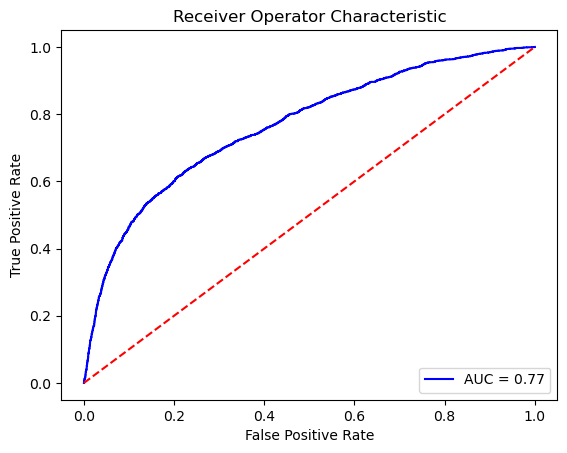

In [47]:
# =================================================-
#### Slide 25: Putting it all together: ROC plot  ####

# Make an ROC curve plot.
plt.title("Receiver Operator Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

0.7658806093460112

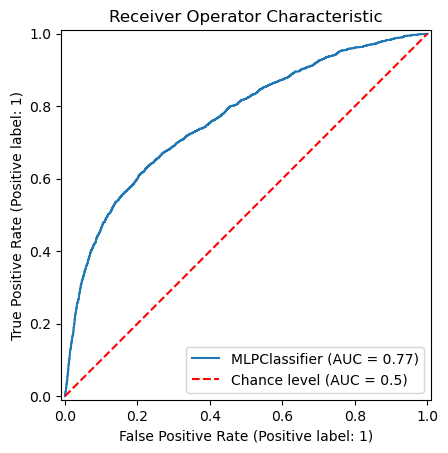

In [48]:
# =================================================-
#### Slide 26: Putting it all together: ROC plot (cont'd)  ####

# Make an ROC curve plot.
rcd = metrics.RocCurveDisplay.from_estimator(nn, X_test_scaled, y_test, plot_chance_level=True, chance_level_kw={"color": "r"})
plt.title("Receiver Operator Characteristic")
rcd.roc_auc

#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [49]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## INTROTONEURALNETWORKS/2 BUILDINGNEURALNETWORKS/INTROTONEURALNETWORKS BUILDINGNEURALNETWORKS 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [50]:
# =================================================-
#### Slide 12: Fitting & visualizing training history: accuracy   ####

N_EPOCHS = 100  # <- number of epochs
N_CLASSES = y_train.unique()  # <- number of classes in the target variable

# Build neural network model by creating a classifier:
# add the number of hidden neurons in the 1st hidden layer and set random state.
mlp = MLPClassifier(hidden_layer_sizes=(64), random_state=1)

def get_scores():
    for _ in range(N_EPOCHS):
        mlp.partial_fit(X_train_scaled, y_train, classes=N_CLASSES)
        yield mlp.score(X_train_scaled, y_train), mlp.score(X_test_scaled, y_test)

In [51]:
scores_train, scores_test = zip(*get_scores())

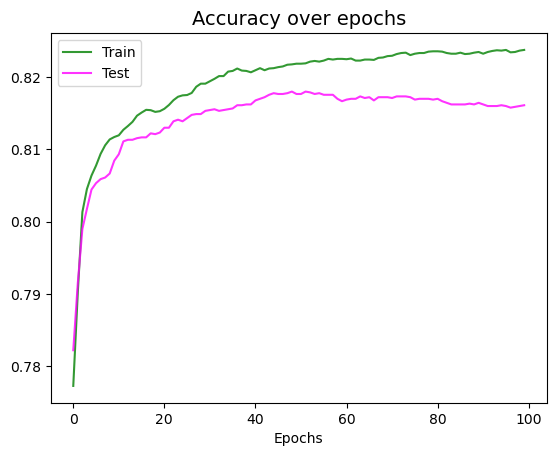

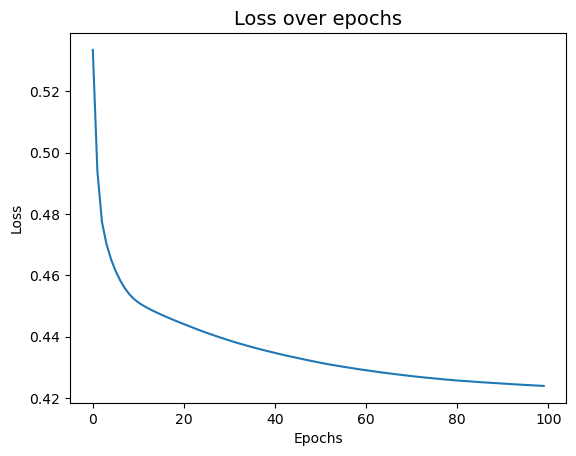

In [52]:
# =================================================-
#### Slide 13: Inspect model accuracy and loss  ####

plt.plot(scores_train, color="green", alpha=0.8, label="Train")
plt.plot(scores_test, color="magenta", alpha=0.8, label="Test")
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel("Epochs")
plt.legend(loc="upper left")
plt.show()
plt.plot(mlp.loss_curve_)
plt.title("Loss over epochs", fontsize=14)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [53]:
# =================================================-
#### Slide 14: Inspect model accuracy and loss (cont'd)  ####


In [54]:
# =================================================-
#### Slide 17: Class-imbalanced dataset challenges  ####

y.value_counts(normalize=True)

default_payment_next_month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [55]:
# =================================================-
#### Slide 20: Balancing target with SMOTE (cont'd)  ####

from imblearn.over_sampling import SMOTE

# Let's initialize SMOTE object.
smote = SMOTE()

# We can now fit the sampling method to our train data and labels.
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)
y_train_sm.value_counts()

default_payment_next_month
1    16324
0    16324
Name: count, dtype: int64

In [56]:
smote_nn = MLPClassifier(
    hidden_layer_sizes=(64), random_state=1, max_iter=2000,
)
smote_nn.fit(X_train_sm, y_train_sm) 

MLPClassifier(hidden_layer_sizes=64, max_iter=2000, random_state=1)

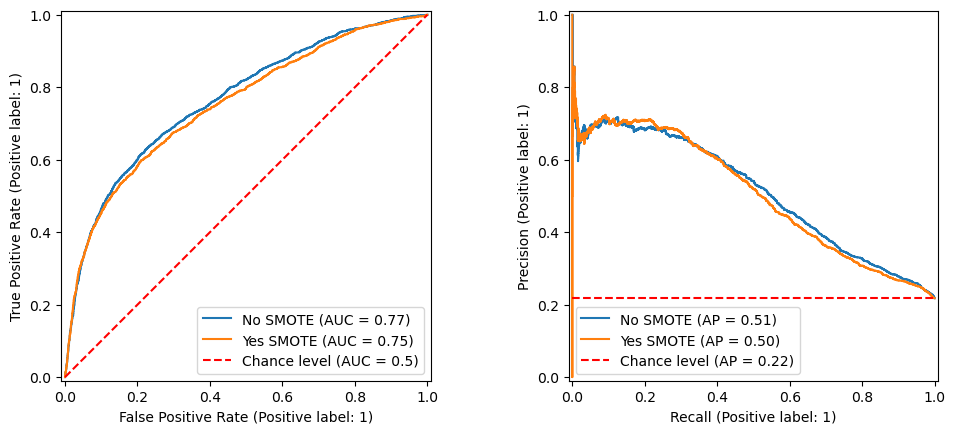

In [57]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(12)
metrics.RocCurveDisplay.from_estimator(nn, X_test_scaled, y_test, ax=ax[0], name="No SMOTE")
metrics.RocCurveDisplay.from_estimator(smote_nn, X_test_scaled, y_test, plot_chance_level=True, chance_level_kw={"color": "r"}, ax=ax[0], name="Yes SMOTE")
metrics.PrecisionRecallDisplay.from_estimator(nn, X_test_scaled, y_test, ax=ax[1], name="No SMOTE")
metrics.PrecisionRecallDisplay.from_estimator(smote_nn, X_test_scaled, y_test, plot_chance_level=True, chance_level_kw={"color": "r"}, ax=ax[1], name="Yes SMOTE");

In [58]:
# =================================================-
#### Slide 23: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################